<center><h1><b>GIT AND GITHUB</b></h1></center>

---

# 00 - INTRODUCTION

#### WHAT IS GIT
Git is a distributed version control system (VCS) used to track changes in files, typically for software development. It allows multiple people to collaborate on a project while keeping a history of modifications. We use git through the shell.
Utilities:
* Version Control: Keeps track of changes and allows you to revert to previous versions.
* Collaboration: Enables multiple developers to work on the same project without conflicts.
* Branching & Merging: Lets you work on new features without affecting the main code until it's ready.
* Backup & History: Your code and its history are stored safely.

#### WHAT IS GITHUB
GitHub is a web-based platform for version control and collaboration, built around Git. It allows developers to store, manage, and share their code efficiently thanks to cloud Storage.

#### LOCAL COPY, STAGING, LOCAL REPO, REMOTE REPO
In Git, changes go through different stages before being permanently stored in a remote repository. Here's how it works:
1. *Working Directory* (Local Copy): this is where you make changes to your files, in your local folder of your local PC.
2. *Staging Area* (Index): this is an intermediate area where you prepare changes before committing. You add files to the staging area using: `git add <file>`. For example: After modifying *file.py*, you run *git add file.py*. Now, it's staged but not yet committed.
3. *Local Repository*: when you commit, changes move from the staging area to your local repository. Commits are stored locally with a unique ID (hash). For example: `git commit -m "Now I have updated file.py"`. Now, file.py is saved in the local Git history.
4. *Remote Repository* (GitHub): your local commits stay on your machine until you push them to a remote server with `git push origin <branch>`. The remote repository allows others to access and collaborate on your code.

Files in your Git repository folder can be in one of 2 states: *tracked*, i.e. files that Git knows about and are added to the repository; *untracked*, i.e. files that are in your working directory, but not added to the repository.

NOTE: the default name of your remote repository on yout GItHub account is **origin**

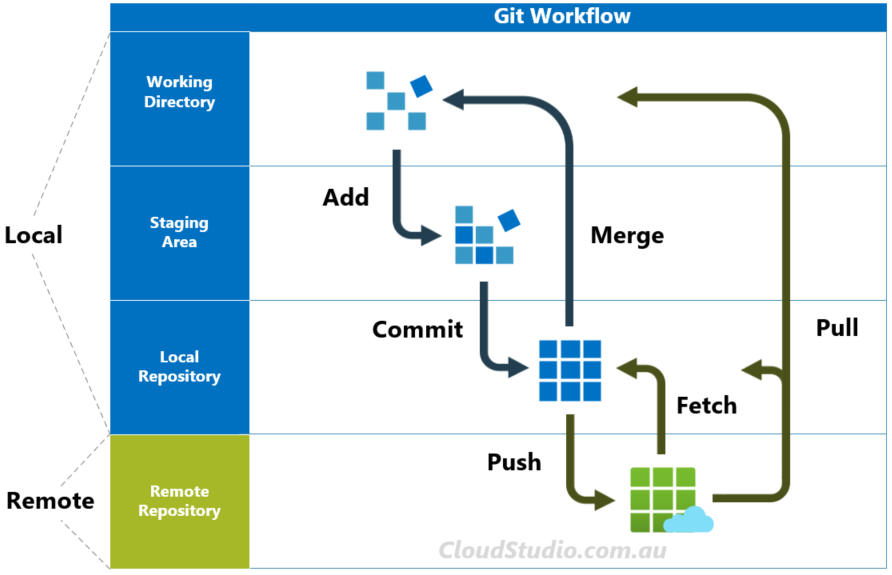

In [5]:
from IPython.display import Image, display
display(Image("./images/git_schematic.png", width=600))

#### COMMITS
In Git, commits can be thought of as snapshots of your repository at specific points in time. Each commit captures the exact state of the entire project, including all files, directories, and changes made up to that point. This allows you to track the history of your project, revert to previous versions, or collaborate with others while maintaining a clean, versioned history.

Each commit is assigned a unique **hash**, which is a long string of characters. This hash serves as an identifier for that specific commit, allowing you to refer to it later and, if needed, restore the state of your repository to exactly how it was at that point in time. For example *a1b2c3d4e5f67890ab12cd34ef56789abcde*.

`HEAD` is a special reference in Git that points to the latest commit in your current branch. It essentially represents the current snapshot of your working directory. similarly `HEAD~n` refers to the n-th previous commit from the current commit. 

#### CREATING A REPO
We can have a Git repository through `git init`: in this way the folder we are in will become a Git repository. A **.git** file will be created inside, that will track all tha changes to existing files, new files, eliminated files etc.  
Similarly with `git clone <url>` we can clone a remote github repository in our local folder. Our folder and the github repository will be connected, and we will be able to push and pull files.

In general, it's better to use your token for the clone precedure. In this way, GitHub will not ask you your password/token every time you want to push something:

`git clone https://<YourToken>@github.com/<YourUsername>/<repo_name>.git`

#### FORK, ORIGIN AND UPSTREAM
When working with Git, especially in open-source projects, you’ll often work with forks, origin, and upstream repositories.

A **fork** is a personal copy of someone else's repository. You can make changes in your fork without affecting the original project. Forking is commonly used when contributing to open-source projects or when you want to work on a project without pushing changes directly to the main repository of other users. When you fork a repository on GitHub, you create a copy of it under your GitHub account. The default names for thiese repos will be **origin** for the one you forked (the one in your GitHub) and **upstream** for the original one of the other user in his GitHub.  
The steps are:
1. Fork the project of someone else on GitHub (this will be called your **upstream** repo). This will create a new remote repository on your GitHub (called **origin**).
2. Clone the fork to your local machine.
3. Make changes in your local copy, i.e. work on the project with your own ideas.
4. Push changes to your forked repository (origin).
5. If you want to contribute to the original project, create a **pull request** to the upstream repository. This will send a request to the original owner of the repo to add your own changes and improvements. The request could be or could not be accepted.

To see the GitHub links of the origin and upstream repos, you can type `git remote -v`. This will show something like:

    origin  https://github.com/your-username/repo.git (fetch)
    origin  https://github.com/your-username/repo.git (push)
    upstream  https://github.com/original-author/repo.git (fetch)
    upstream  https://github.com/original-author/repo.git (push)
    
When you fork and then clone a repo, you have to tell Git which is the link of the original repo with `git remote add upstream <url>`. Similarly if you first create a local repo with *git init* and then you want to chain it to your remote repo you have to use `git remote add origin <url>` with the GitHub url of your repo. You can always change the repo, i.e. the url, which your local repo is pointing to using `git remote set-utl upstream <url>`, and similarly with *origin*.

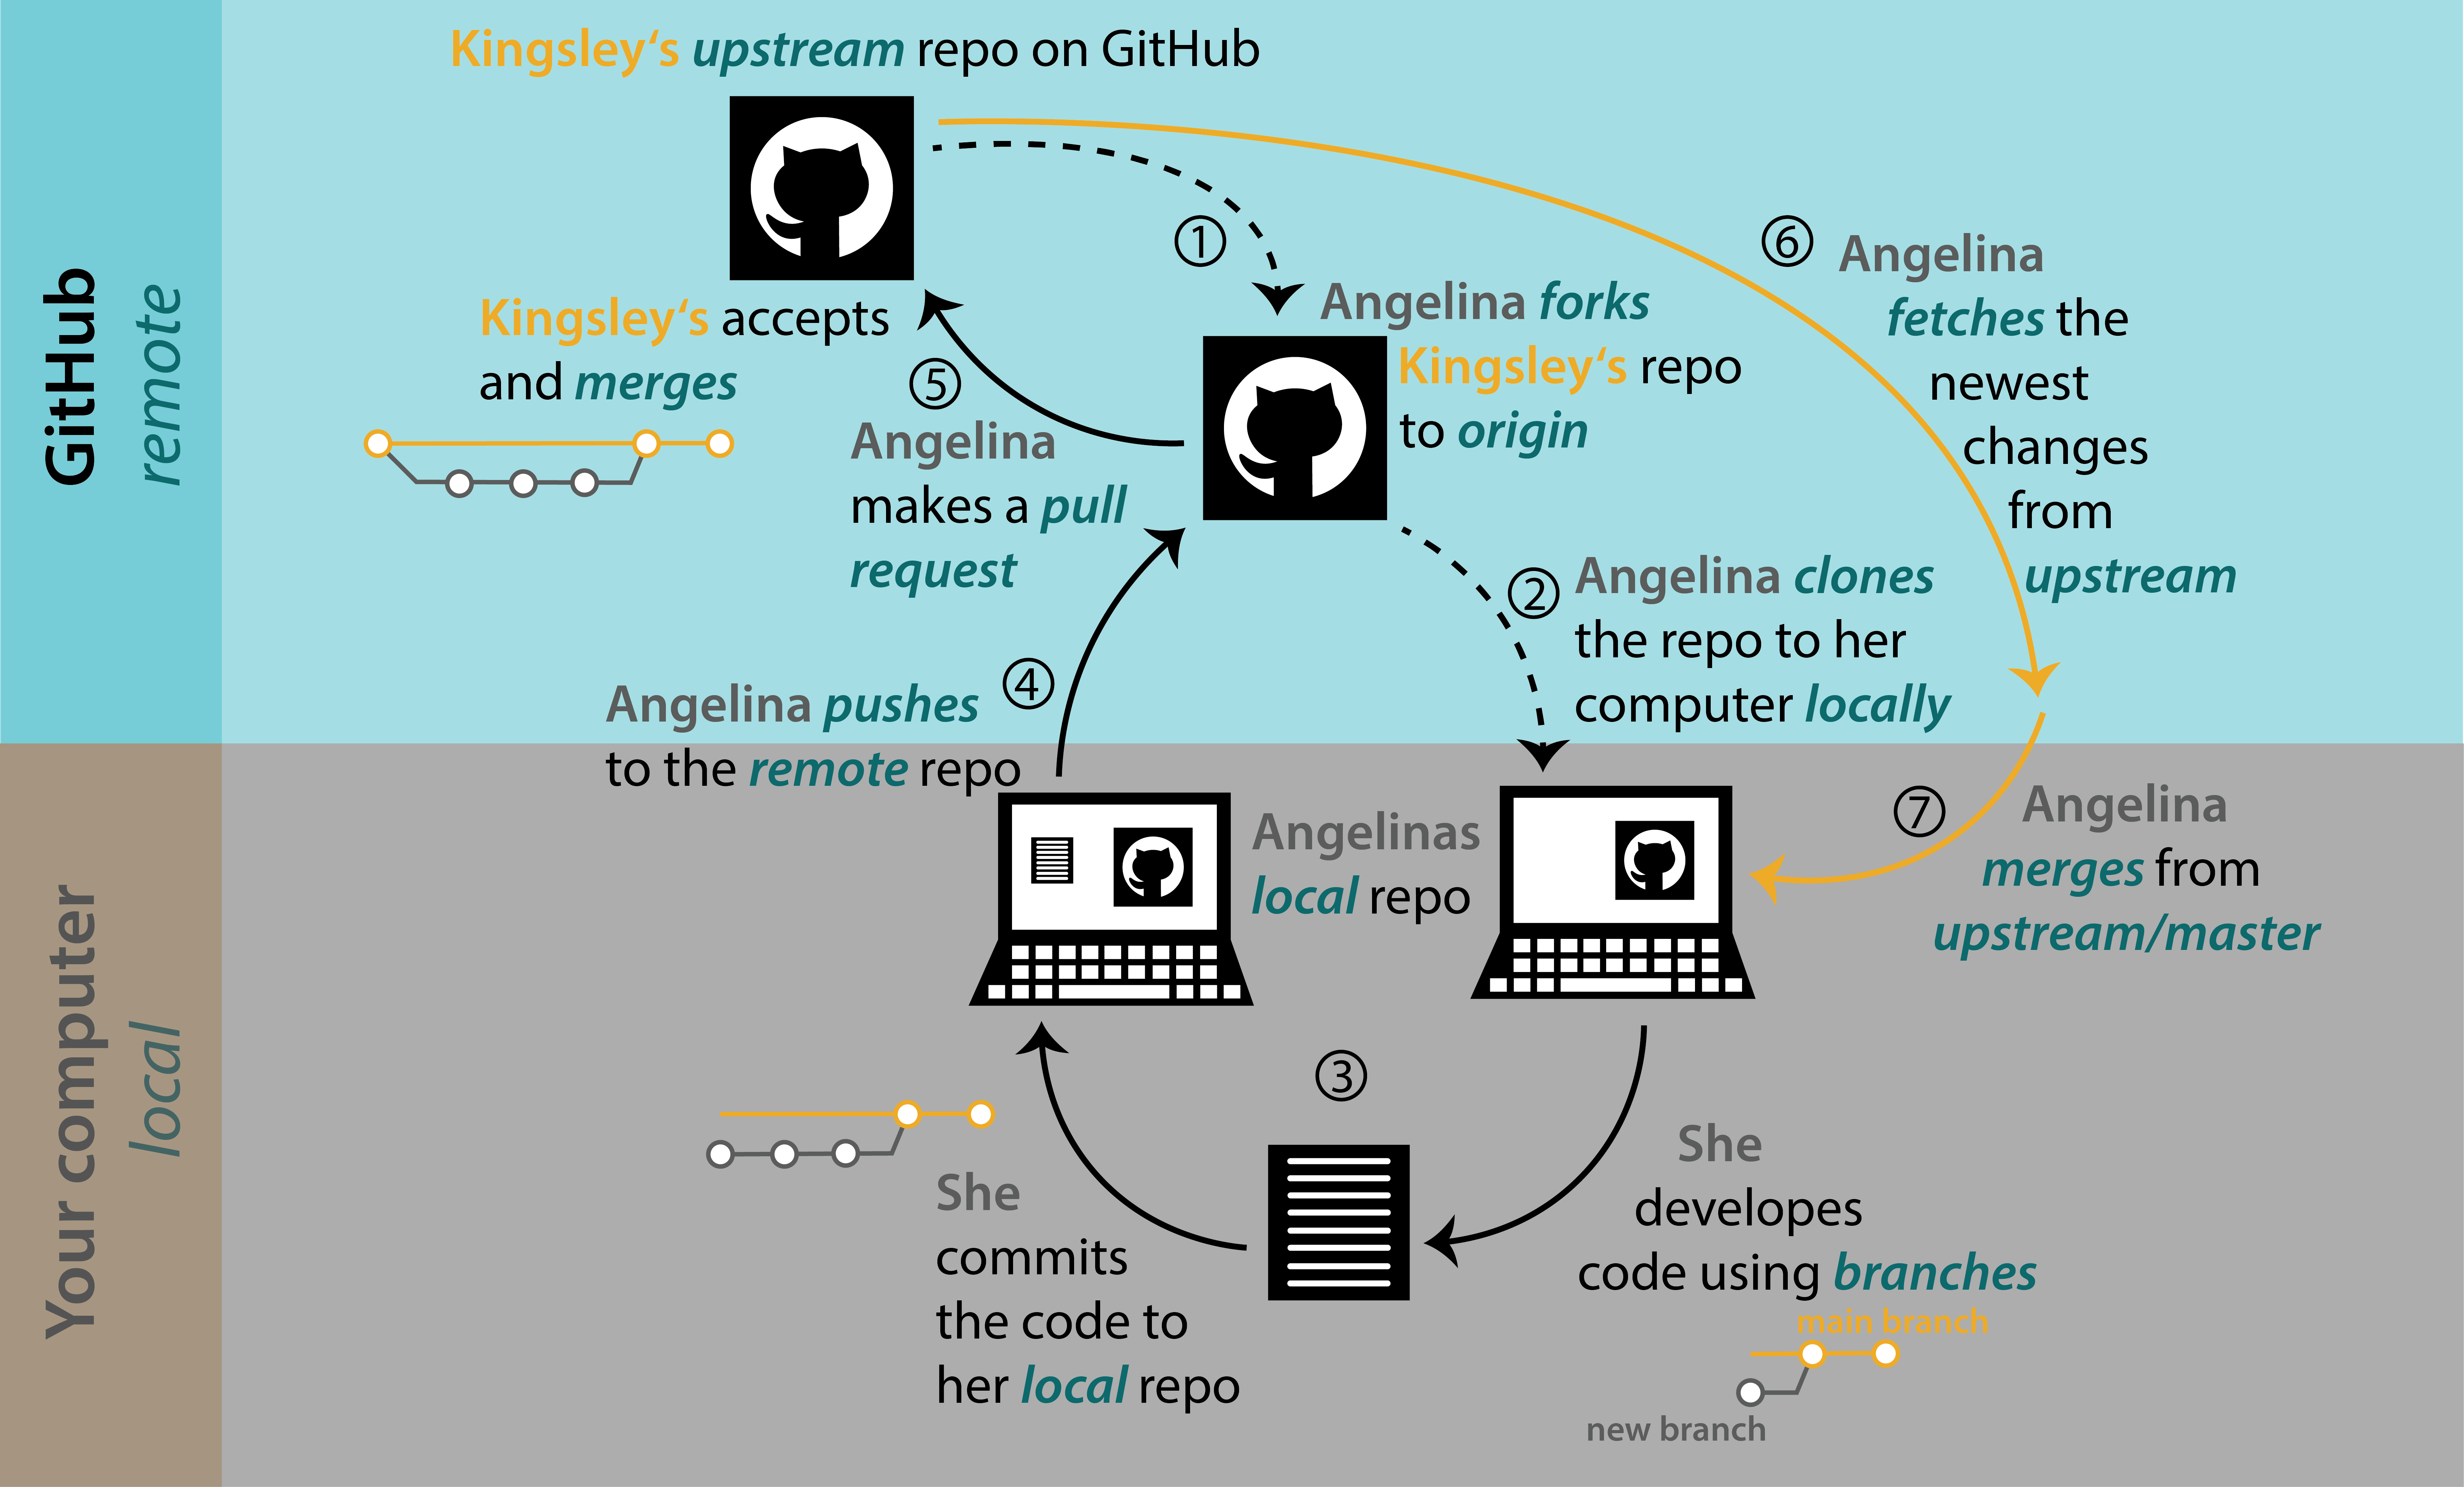

In [4]:
display(Image("./images/upstream.png", width=800))

#### CONFIGURATION
Each local repository will have a local configuration that will contain our identity: username and email. Similarly we will have a global configuration.  
With can use:
* `git config --local user.name "Tuo Nome"`: to set the local username
* `git config --local user.email "tua.email@example.com"`: to set the local email
* `git config --local --list`: to see the actual configuration

Similarly we have a global default configuration at `gloabl` instead of `local`.

#### STATUS AND CRONOLOGY
* `git status`: mostra lo stato dei file (modificati, tracciati, non tracciati)
* `git log` : mostra la cronologia dei commit
    * `git log --oneline`: sintetic view of cronology
    * `git log --oneline --graph --all`: visualizza i commit in modo compatto e grafico
* `git ls-files`: list all the files that are currently being tracked by Git in the repository. It shows the paths of all files that are staged, committed, and present in the repository's index (staging area).

You can always find more info on a command typing `git <command> help`.

The history of commits will show something like this:

    git log --oneline
    
    a3c1e22 (HEAD -> main) Update README with project details
    87c6a14 Fix bug in profile page rendering
    d5f9a71 Implement search functionality for products
    1a2b3c4 Initial commit: setup project structure

The codes you see are **commit hashes** (shortened to 7 characters), unique identifiers for the commits. You will use them when you want to return to specific old commits.  
`HEAD -> main` means that you are currently on the main branch, the HEAD pointer is at the latest commit on that branch.

---

# 01 - DEAL WITH FILES

#### TO UPLOAD CHANGES
1. `git add <file>`: aggiunge un file alla staging area
    * `git add . `: aggiunge tutti i file modificati alla staging area
2. `git commit -m "Messaggio"`: salva i cambiamenti con un messaggio descrittivo
    * `git commit --amend -m "Messaggio corretto"`: modifica l'ultimo commit
    * `git commit -m -a "Messaggio"`: con '-a' saltiamo la fase di 'add'
3. `git push origin <branch>`: carica i commit su un repository remoto
    * `git push --all origin`: fa il push di tutti i branch

NOTE: Staged files are files that are ready to be committed to the repository you are working on.  
NOTE: when committing, Git will take a snapshot (=copy) of the state of your repo, so in the future you can always return to each commit state. 

#### TO DOWNLOAD CHANGES
* `git pull origin <branch>`: scarica e unisce le modifiche dal repository remoto
    * `git fetch` + `git merge`: scarica i cambiamenti dal repository remoto e poi li unisce

NOTE: Git doesn't provide a single command to pull updates from all branches at the same time, you have to do it for each branch

#### DEAL WITH MODIFICATIONS
* `git reset <commit>`: RESETS STAGING: Removes files from the staging area (but leaves the changes in the working directory), reverting the staging area for example to the state of the previous commit (using 'HEAD'). With *git reset file_name*, only that specific file is removed from the staging area. Note: this command corresponds implicitly to *git reset --mixed*.
    * `git reset --hard <commit>`: RESETS STAGING AND WORKING: moves the repository back to a previous commit, discarding any changes made after that commit, both from the staging area and the working directory.
    * `git reset --soft <commit>`: RESETS ONLY TO THE COMMIT: moves the repository back to a previous commit, without discarding any changes made after that commit (it doesn't touch staging or working areas).
* `git revert <commit>`: creates a new commit that undoes the changes introduced by the specified commit, keeping the commit history intact. In pratica, inverte i cambiamenti del commit specificato e crea un nuovo commit con l'effetto opposto.
    * `git revert HEAD`: we revert to the latest commit
    * `git revert HEAD~n`: we revert to the n-th latest commit, 'n' being a number
* `git restore <file>`: revert the specified file(s) back to the state of the last commit, discarding any changes made in the working directory.
    * `git restore --staged <file>`:  removes the file(s) from the staging area, but leaves the changes in the working directory.
* `git clean`: removes untracked files from the working directory.
* `git rm <file>`: removes the file from the working directory (your file system) and stages the deletion for the next commit.
* `git mv <old-file-name> <new-file-name>`: It combines two actions: it moves or renames a file in the working directory, and it stages that change for the next commit 

#### SEE DIFERENCES
The `git diff` command shows the differences between various states of your repository. It’s used to compare changes in your working directory, staging area, and commits. With it we can:
* `git diff`: shows the differences between the current working directory (the files you’ve modified) and the staging area (the changes you've staged with git add).
* `git diff HEAD`: shows the differences between the working directory (modified files) and the last commit (HEAD).
* `git diff <commit1> <commit2>`: shows the differences between the contents of the two commits.

---

# 02 - BRANCHING

Branching in Git allows you to work on different versions of a project simultaneously without affecting the main codebase. It's like creating a parallel universe where you can experiment, develop new features, or fix bugs without disrupting the stable version. When the work is complete, a branch can be merged with the main project. You can even switch between branches and work on different projects without them interfering with each other. While you are working in a branch, the Git folder will show you the files f that branch. When you change branch, Git automatically will show in the folder the files of that branch.

Every Git project starts with a default branch, usually called **main** (this name can be modified, tipycally in 'master' or similar). 

#### BRANCHING
* `git branch`: mostra i branch esistenti
* `git branch <nome-branch>`: crea un nuovo branch
* `git branch -d <nome-branch>`: for deleting a branch. If it's not yet merged with another branch, you have to use '-D' instead
* `git checkout <nome-branch>` o `git switch <nome-branch>`: passa a un branch esistente
    * `git checkout -b <nome-branch>`: create a new branch and switch to it
* `git push origin --delete <nome-branch>`: to push in the remote repo the fact that you eliminated a branch
* `git checkout <nome_branch> -- <path/to/file>`: get a file from another branch and place it into your current working directory.
    * `git restore --source=<nome_branch> <path/to/file>`: same but using git restore

#### UNIFICATION OF BRANCHES:
* `git merge <nome-branch>`: unisce il branch specificato nel branch attuale. Se ci sono conflitti, Git ti chiederà di risolverli prima di completare l’operazione.
    * `git merge -m "descrizione" <nome-branch>`: to add a description to the commit of the merge
* `git rebase <nome-branch>`: sposta il branch attuale sopra il branch di destinazione, riscrivendo la cronologia. Questo prende i commit del branch attuale e li "riapplica" sopra quello di destinazione, come se il branch fosse stato creato direttamente dall’ultima versione di main.

# 03 - GIT IGNORE
When sharing your code with others, there are often files or parts of your project, you do not want to share, like the checkpoints of a jupyter notebook. Git can specify which files or parts of your project should be ignored by Git using a **.gitignore** file. Git will not track files and folders specified in .gitignore. However, the .gitignore file itself IS tracked by Git. We can use a single .gitignore which applies to the entire repository. It is also possible to have additional .gitignore files in subdirectories. These only apply to files or folders within that directory.

To create a .gitignore file, go to the root of your local Git, and create it with `touch .gitignore`. Now open the file using a text editor, and write something like:

    # ignore all '.log' files with symbol '*'
    *.log
    # ignore all checkpoints inside the jupyter folders
    .ipynb_checkpoints/

Rules for **.gitignore** (see all at [link](https://www.w3schools.com/git/git_ignore.asp?remote=github)):
* `# text comment`: lines starting with # are ignored
* `name`: all 'name' files, 'name' folders, and files and folders in any 'name' folder
* `name/`: ending with '/' specifies the pattern is for a folder. Matches all files and folders in any 'name' folder
* `**/name`: all 'name' folders, and files and folders in any 'name' folder
* `*.file`: all files withe '.file' extention
* `name?.file`: '?' matches a single non-specific character